# Determine $M_r$ cut for SDSS sample
In this notebook I determine the $M_r$ completeness cut for the SDSS sample.

In [1]:
import os 
import h5py
import numpy as np
# -- astrologs -- 
from astrologs.astrologs import Astrologs 
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
sdss = Astrologs("tinkergroup", mlim='9.7', cross_nsa=True)
nsa = Astrologs("nsa")

(-15.0, -25.0)

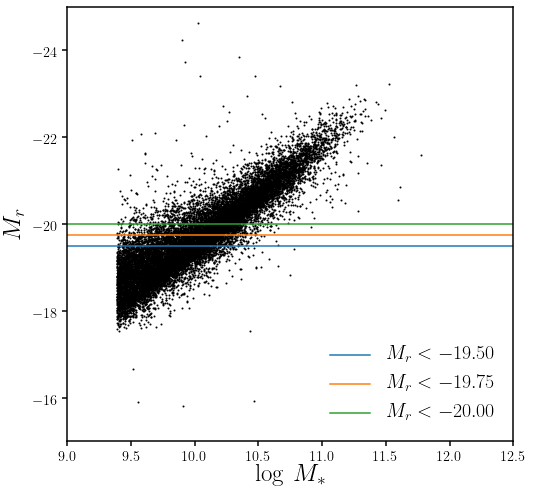

In [3]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
#sub.scatter(nsa.data['log.M_star'][nsa.data['redshift'] < sdss.data['redshift'].max()], nsa.data['M_r'][nsa.data['redshift'] < sdss.data['redshift'].max()], s=1, c='r')
sub.scatter(sdss.data['log.M_star'], sdss.data['NSA_ABSMAG'][:,4], s=1, c='k')
for mrcut in [-19.5, -19.75, -20]:
    sub.plot([9.0, 12.5], [mrcut, mrcut], label='$M_r < %.2f$' % mrcut)
sub.legend(loc='lower right', fontsize=20)
sub.set_xlabel('$\log\,M_*$', fontsize=25)
sub.set_xlim(9., 12.5)
sub.set_ylabel('$M_r$', fontsize=25)
sub.set_ylim(-15, -25)

By eye it seems $M_r < -20$ is the most conservative. Lets compare with NSA, which doesn't have the $M_*$ cut that Jeremy imposed and see which cut is most sensible

/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


(-15.0, -25.0)

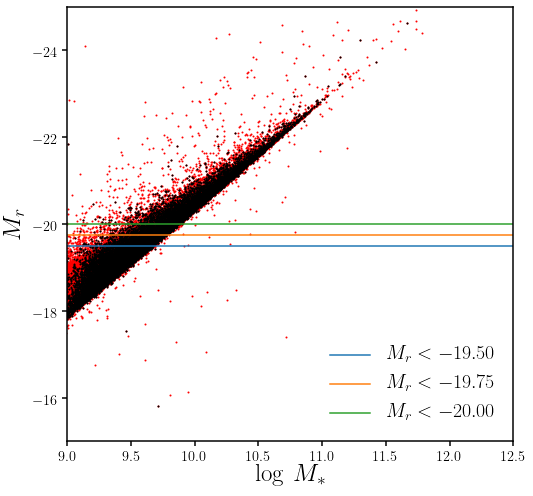

In [4]:
fig = plt.figure(figsize=(8,8))
sub = fig.add_subplot(111)
sub.scatter(nsa.data['log.M_star'][nsa.data['redshift'] < sdss.data['redshift'].max()], nsa.data['M_r'][nsa.data['redshift'] < sdss.data['redshift'].max()], s=1, c='r')
sub.scatter(np.log10(sdss.data['NSA_MASS']) + np.log10(0.7**2), sdss.data['NSA_ABSMAG'][:,4], s=1, c='k')
for mrcut in [-19.5, -19.75, -20]:
    sub.plot([9.0, 12.5], [mrcut, mrcut], label='$M_r < %.2f$' % mrcut)
sub.legend(loc='lower right', fontsize=20)
sub.set_xlabel('$\log\,M_*$', fontsize=25)
sub.set_xlim(9., 12.5)
sub.set_ylabel('$M_r$', fontsize=25)
sub.set_ylim(-15, -25)

Lets go with $M_r < -20$